In [3]:

import psycopg2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt


import seaborn as sns
import datetime

from Ignore import db_cred
conn = db_cred.connect_db()

In [4]:
query2 = '''
SELECT * 
FROM pitching AS p
ORDER BY p."yearID", p."teamID" ASC, p."playerID" ASC;
'''

In [27]:
df2 = pd.read_sql(query2, conn)

df2.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,spaldal01,1871.0,1.0,BS1,NA,19.0,10.0,31.0,31.0,22.0,...,NaN,NaN,NaN,0.0,NaN,NaN,272.0,NaN,NaN,NaN
1,wrighha01,1871.0,1.0,BS1,NA,1.0,0.0,9.0,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,31.0,NaN,NaN,NaN
2,pinkhed01,1871.0,1.0,CH1,NA,1.0,0.0,3.0,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,8.0,NaN,NaN,NaN
3,zettlge01,1871.0,1.0,CH1,NA,18.0,9.0,28.0,28.0,25.0,...,NaN,NaN,NaN,0.0,NaN,NaN,233.0,NaN,NaN,NaN
4,paborch01,1871.0,1.0,CL1,NA,0.0,2.0,7.0,1.0,1.0,...,NaN,NaN,NaN,0.0,NaN,NaN,53.0,NaN,NaN,NaN


In [12]:
list(df2)

['playerID',
 'yearID',
 'stint',
 'teamID',
 'lgID',
 'W',
 'L',
 'G',
 'GS',
 'CG',
 'SHO',
 'SV',
 'IPouts',
 'H',
 'ER',
 'HR',
 'BB',
 'SO',
 'BAOpp',
 'ERA',
 'IBB',
 'WP',
 'HBP',
 'BK',
 'BFP',
 'GF',
 'R',
 'SH',
 'SF',
 'GIDP']

/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


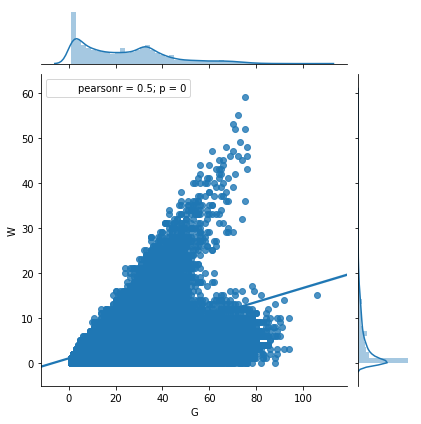

In [10]:
sns.jointplot(x="G", y="W", data=df2, kind = 'reg')


/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


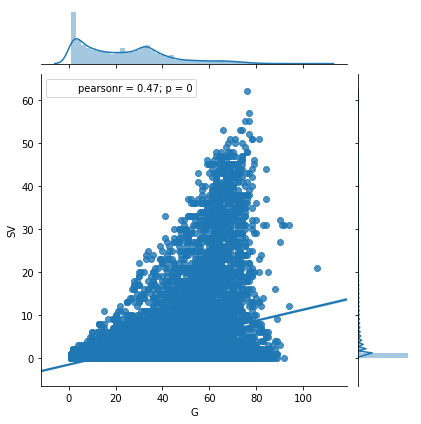

In [11]:
sns.jointplot(x="G", y="SV", data=df2, kind = 'reg')


/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


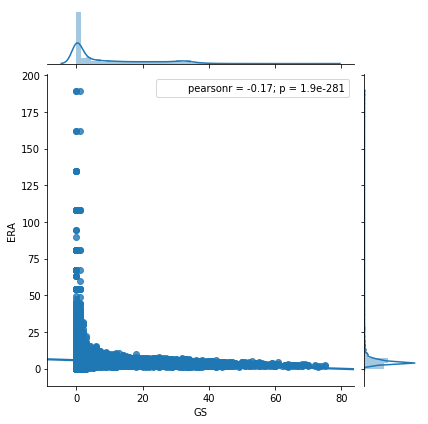

In [24]:
sns.jointplot(x ="GS", y="ERA", data=df2, kind = 'reg')


In [28]:
df2["fip"] = (13 * df2["HR"] + 3 * (df2["HBP"] + df2["BB"]) - 2 * df2["SO"]) / (df2["IPouts"] / 3) + 3.2

df2["fip"].tail()

44958    3.457143
44959    3.291971
44960    2.834146
44961    2.976524
44962    3.677612
Name: fip, dtype: float64

In [30]:
df2["whip"] = (df2["BB"] + df2["H"]) / (df2["IPouts"] / 3)

df2["whip"].tail()

44958    1.114286
44959    0.967883
44960    1.268293
44961    1.103837
44962    1.223881
Name: whip, dtype: float64

In [40]:
df2["gmscre"] = 50 + df2["SO"] + (df2["IPouts"] * 2) - (df2["H"] * 2) - (df2["R"] * 3) - (df2["HR"] * 4)

df2["gmscre"].tail()

44958     104.0
44959    1019.0
44960     241.0
44961     644.0
44962     336.0
Name: gmscre, dtype: float64

/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


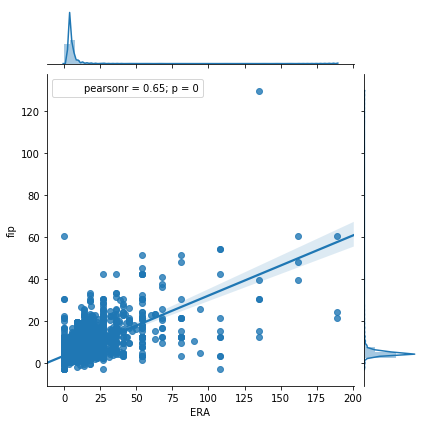

In [41]:
sns.jointplot(x="ERA", y="fip", data=df2, kind = 'reg')


/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


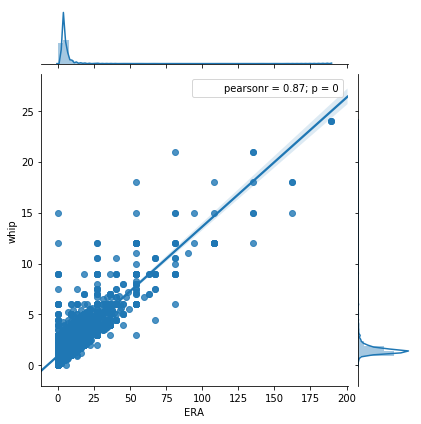

In [35]:
sns.jointplot(x="ERA", y="whip", data=df2, kind = 'reg')


/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


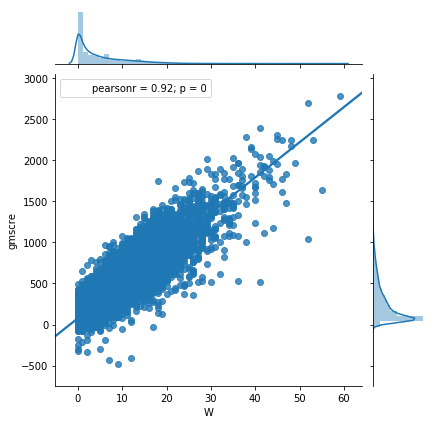

In [42]:
sns.jointplot(x="W", y="gmscre", data=df2, kind = 'reg')


/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


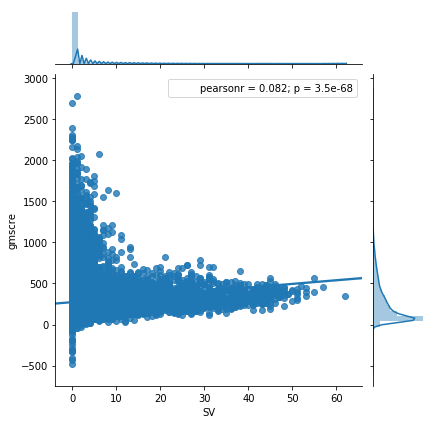

In [43]:
sns.jointplot(x="SV", y="gmscre", data=df2, kind = 'reg')


ValueError: Could not interpret input 'FIP'

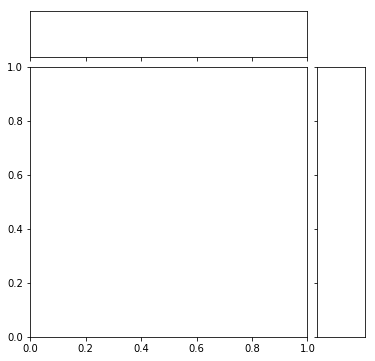

In [51]:
sns.jointplot(x="SV", y="FIP", data=df2, kind = 'reg')


ValueError: Could not interpret input 'WHIP'

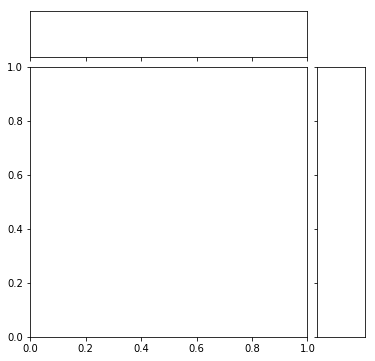

In [52]:
sns.jointplot(x="ERA", y="WHIP", data=df2, kind = 'reg')


/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


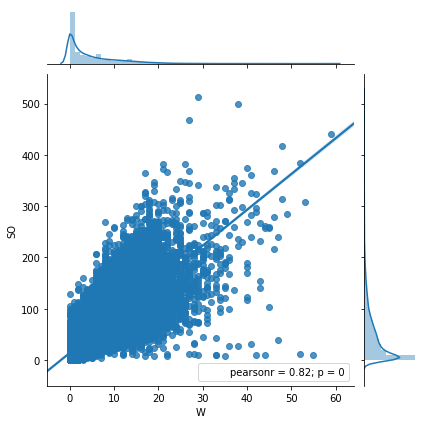

In [55]:
sns.jointplot(x="W", y="SO", data=df2, kind = 'reg')


/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


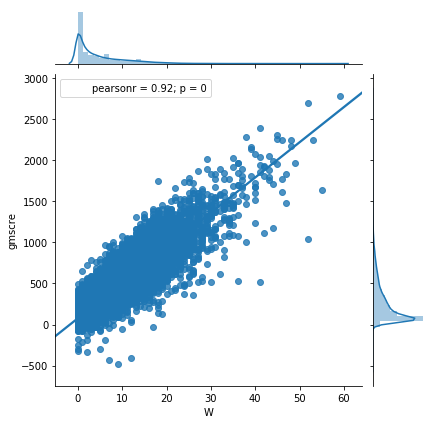

In [57]:
sns.jointplot(x="W", y="gmscre", data=df2, kind = 'reg')


/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


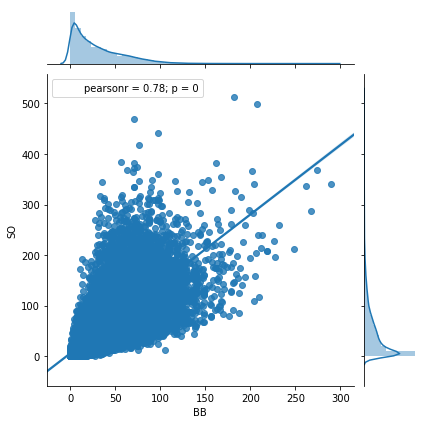

In [56]:
sns.jointplot(x="BB", y="SO", data=df2, kind = 'reg')


In [3]:
query = '''
SELECT * 
FROM pitching AS p
JOIN allstar_full AS allstr
    ON allstr."playerID" =p."playerID"
JOIN master as m
    ON m."playerID" =p."playerID"
WHERE allstr."yearID" = p."yearID" AND m."playerID" =p."playerID"
ORDER BY allstr."yearID" DESC, p."playerID" ASC;
'''

In [4]:
df = pd.read_sql(query, conn)
prefix_col = []
for i, col in enumerate(list(df)):
    if i < 30:
        prefix_col.append('p_{}'.format(col))
    elif i < 38:
        prefix_col.append('allstr_{}'.format(col))
    else:
        prefix_col.append('m_{}'.format(col))
        
df.columns = prefix_col
df.head()

,p_playerID,p_yearID,p_stint,p_teamID,p_lgID,p_W,p_L,p_G,p_GS,p_CG,...,m_nameLast,m_nameGiven,m_weight,m_height,m_bats,m_throws,m_debut,m_finalGame,m_retroID,m_bbrefID
0,arrieja01,2016.0,1.0,CHN,NL,18.0,8.0,31.0,31.0,1.0,...,Arrieta,Jacob Joseph,225.0,76.0,R,R,2010-06-10,2016-09-28,arrij001,arrieja01
1,betande01,2016.0,1.0,NYA,AL,3.0,6.0,73.0,0.0,0.0,...,Betances,Dellin,265.0,80.0,R,R,2011-09-22,2016-10-01,betad001,betande01
2,brachbr01,2016.0,1.0,BAL,AL,10.0,4.0,71.0,0.0,0.0,...,Brach,Brad,215.0,78.0,R,R,2011-08-31,2016-10-01,bracb001,brachbr01
3,brittza01,2016.0,1.0,BAL,AL,2.0,1.0,69.0,0.0,0.0,...,Britton,Zachary Grant,195.0,75.0,L,L,2011-04-03,2016-10-02,britz001,brittza01
4,bumgama01,2016.0,1.0,SFN,NL,15.0,9.0,34.0,34.0,4.0,...,Bumgarner,Madison Kyle,250.0,77.0,R,L,2009-09-08,2016-09-30,bumgm001,bumgama01


In [5]:
list(df)

['p_playerID',
 'p_yearID',
 'p_stint',
 'p_teamID',
 'p_lgID',
 'p_W',
 'p_L',
 'p_G',
 'p_GS',
 'p_CG',
 'p_SHO',
 'p_SV',
 'p_IPouts',
 'p_H',
 'p_ER',
 'p_HR',
 'p_BB',
 'p_SO',
 'p_BAOpp',
 'p_ERA',
 'p_IBB',
 'p_WP',
 'p_HBP',
 'p_BK',
 'p_BFP',
 'p_GF',
 'p_R',
 'p_SH',
 'p_SF',
 'p_GIDP',
 'allstr_playerID',
 'allstr_yearID',
 'allstr_gameNum',
 'allstr_gameID',
 'allstr_teamID',
 'allstr_lgID',
 'allstr_GP',
 'allstr_startingPos',
 'm_playerID',
 'm_birthYear',
 'm_birthMonth',
 'm_birthDay',
 'm_birthCountry',
 'm_birthState',
 'm_birthCity',
 'm_deathYear',
 'm_deathMonth',
 'm_deathDay',
 'm_deathCountry',
 'm_deathState',
 'm_deathCity',
 'm_nameFirst',
 'm_nameLast',
 'm_nameGiven',
 'm_weight',
 'm_height',
 'm_bats',
 'm_throws',
 'm_debut',
 'm_finalGame',
 'm_retroID',
 'm_bbrefID']

Trim Data

Number of "All Star" Pitchers to Debut after Integration (1947)

In [6]:
df = df[df["m_debut"]>datetime.datetime(1947, 1, 1).date()]
df['m_playerID'].nunique()

633

# Formula Stats

FIP vs ERA

Calculate FIP then Plot FIP vs ERA

Fielding Independent Pitching converts a pitcher's three true outcomes into an earned run average-like number. The formula is (13*HR+3*(HBP+BB)-2*K)/IP, plus a constant (usually around 3.2) to put it on the same scale as earned run average.

In [7]:
df["fip"] = (13 * df["p_HR"] + 3 * (df["p_HBP"] + df["p_BB"]) - 2 * df["p_SO"]) / (df["p_IPouts"] / 3) + 3.2

df["fip"].head()

0    3.575000
1    1.830137
2    2.972152
3    1.991045
4    3.297059
Name: fip, dtype: float64

WHIP vs ERA? 

WHIP=(BB+H)/IP 

In [8]:
df["whip"] = (df["p_BB"] + df["p_H"]) / (df["p_IPouts"] / 3)
df["whip"].head()

0    1.084459
1    1.123288
2    1.037975
3    0.835821
4    1.027941
Name: whip, dtype: float64

gameScore (Bill James https://en.wikipedia.org/wiki/Game_score)


ratingAdj=4.7∗(pitcherrGS–teamrGS) --> pitcher rating relative to his team's rating

Calculate gameScore=50+strikeouts+(outs∗1.5)–(walks∗2)–(hits∗2)–(runs∗3)–(homeruns∗4)

50 can be changed.

In [9]:
df["gameScore"] = 50 + df["p_SO"] + (df["p_IPouts"] * 2) - (df["p_H"] * 2) - (df["p_R"] * 3) - (df["p_HR"] * 4)

df["gameScore"].head()

0    868.0
1    393.0
2    405.0
3    425.0
4    962.0
Name: gameScore, dtype: float64

BABIP The formula: Hits minus home runs, divided by at-bats minus home runs minus strikeouts plus sacrifice flies 
Babip Formula (H - HR)/(AB - HR - K + SF).


a statistic which measures how often non-home run batted balls fall for hits. BABIP can be usefu lin two ways. A player's BABIP over a large sample can tell you something about the quality of the player, and big deviations from a player's career average BABIP can tell you something about their luck or the performance of the defense. 
(Leage average is around .300)

In [10]:
df["BABIP"] = (df["p_H"] - df["p_HR"]) / (df["p_BFP"] - df["p_HR"] - df["p_SO"] + (df["p_SH"] + df["p_SF"]))
df["BABIP"].head()

0    0.206081
1    0.288235
2    0.232558
3    0.205556
4    0.237578
Name: BABIP, dtype: float64

In [11]:
list(df)

['p_playerID',
 'p_yearID',
 'p_stint',
 'p_teamID',
 'p_lgID',
 'p_W',
 'p_L',
 'p_G',
 'p_GS',
 'p_CG',
 'p_SHO',
 'p_SV',
 'p_IPouts',
 'p_H',
 'p_ER',
 'p_HR',
 'p_BB',
 'p_SO',
 'p_BAOpp',
 'p_ERA',
 'p_IBB',
 'p_WP',
 'p_HBP',
 'p_BK',
 'p_BFP',
 'p_GF',
 'p_R',
 'p_SH',
 'p_SF',
 'p_GIDP',
 'allstr_playerID',
 'allstr_yearID',
 'allstr_gameNum',
 'allstr_gameID',
 'allstr_teamID',
 'allstr_lgID',
 'allstr_GP',
 'allstr_startingPos',
 'm_playerID',
 'm_birthYear',
 'm_birthMonth',
 'm_birthDay',
 'm_birthCountry',
 'm_birthState',
 'm_birthCity',
 'm_deathYear',
 'm_deathMonth',
 'm_deathDay',
 'm_deathCountry',
 'm_deathState',
 'm_deathCity',
 'm_nameFirst',
 'm_nameLast',
 'm_nameGiven',
 'm_weight',
 'm_height',
 'm_bats',
 'm_throws',
 'm_debut',
 'm_finalGame',
 'm_retroID',
 'm_bbrefID',
 'fip',
 'whip',
 'gameScore',
 'BABIP']

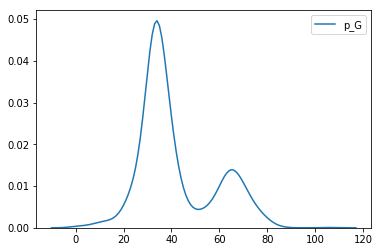

In [12]:
sns.kdeplot(df['p_G'].dropna())


/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


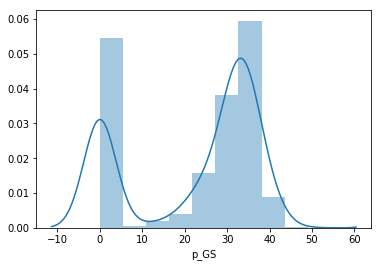

In [13]:
sns.distplot(df['p_GS'].dropna())

/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


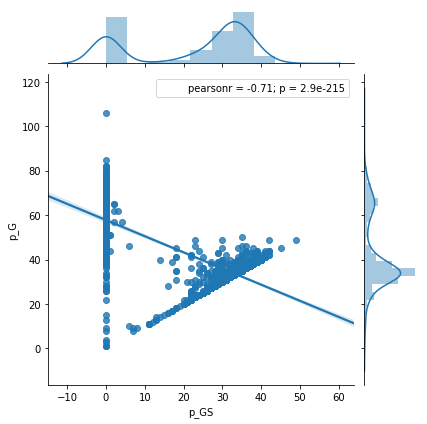

In [14]:
sns.jointplot(x="p_GS", y="p_G", data=df, kind = 'reg')

# Games vs Gamse started 
#Cut out relievers by saying "everyone over X amount of starts" (15?)
# What does this achieve? It shows us the amount of pitchers that are "Allstars" as Career starting pitchers. 
#are there many pitchers who succeed as Starting Pitcher and Relief Pitcher? 

/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


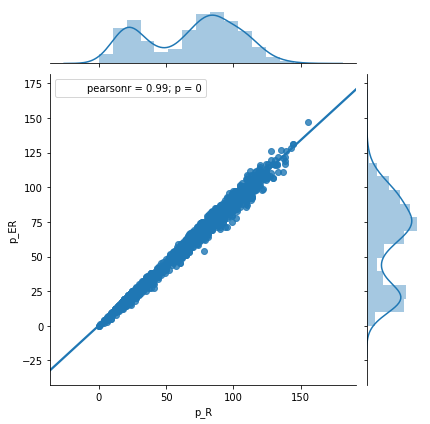

In [15]:
sns.jointplot(x="p_R", y="p_ER", data=df, kind = 'reg')


In [16]:
#  All star pitchers vs non_allstar pitchers  --> FIP, ERA, WHIP, BABIP, gameScore 
# over X amount of Starts and X amount of relief innings 

In [17]:
query2 = '''
SELECT * 
FROM pitching AS p
JOIN master as m
    ON m."playerID" = p."playerID"
WHERE allstr."yearID" = p."yearID" AND m."playerID" =p."playerID"
ORDER BY allstr."yearID" DESC, p."playerID" ASC;
'''

In [18]:
df2 = pd.read_sql(query, conn)

df2.head()


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,arrieja01,2016.0,1.0,CHN,NL,18.0,8.0,31.0,31.0,1.0,...,Arrieta,Jacob Joseph,225.0,76.0,R,R,2010-06-10,2016-09-28,arrij001,arrieja01
1,betande01,2016.0,1.0,NYA,AL,3.0,6.0,73.0,0.0,0.0,...,Betances,Dellin,265.0,80.0,R,R,2011-09-22,2016-10-01,betad001,betande01
2,brachbr01,2016.0,1.0,BAL,AL,10.0,4.0,71.0,0.0,0.0,...,Brach,Brad,215.0,78.0,R,R,2011-08-31,2016-10-01,bracb001,brachbr01
3,brittza01,2016.0,1.0,BAL,AL,2.0,1.0,69.0,0.0,0.0,...,Britton,Zachary Grant,195.0,75.0,L,L,2011-04-03,2016-10-02,britz001,brittza01
4,bumgama01,2016.0,1.0,SFN,NL,15.0,9.0,34.0,34.0,4.0,...,Bumgarner,Madison Kyle,250.0,77.0,R,L,2009-09-08,2016-09-30,bumgm001,bumgama01


/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/md1265/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


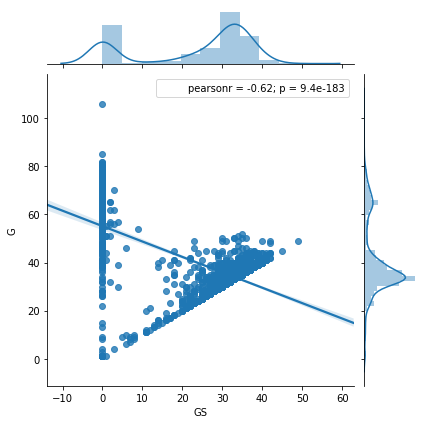

In [19]:
sns.jointplot(x="GS", y="G", data=df2, kind ='reg')


ValueError: Could not interpret input 'GS'

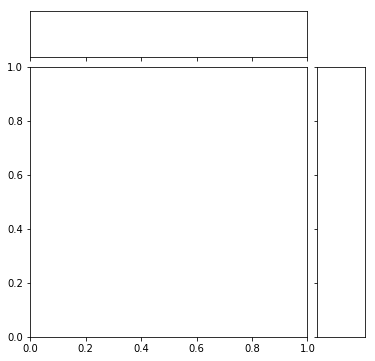

In [20]:
sns.jointplot(x="GS", y="p_GS", data=df)

>>> g = sns.jointplot("total_bill", "tip", data=tips, kind="reg")



>>> import numpy as np, pandas as pd; np.random.seed(0)
>>> import seaborn as sns; sns.set(style="white", color_codes=True)
>>> tips = sns.load_dataset("tips")
>>> g = sns.jointplot(x="total_bill", y="tip", data=tips)

>>> g = sns.jointplot("total_bill", "tip", data=tips, kind="reg")


In [31]:

df['Key'] = 'df'
df2['Key'] = 'df2'

DF = pd.concat([df,df2],keys=['p_playerID','playerID'])

DFGroup = DF.groupby(['p_playerID','playerID'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')

/Users/md1265/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """


AttributeError: 'NoneType' object has no attribute 'is_extension'